# Coursework
This is all my own unaided work unless otherwise referenced
## Problem 1
### 1
First we obtain $X_{t}$ by itos lemma and integrating w.r.t $dt$ and using $X_{0}=1$
$$
\begin{align}
dX_{t} &= \mu X_{t} dt + \sigma X_{t} dW_{t} \\
d\ln(X_{t}) &= \left(\mu + \frac{|\sigma|^{2}}{2}\right)dt + \sigma dW_{t} \\
\ln X_{t} &= \left(\mu+ \frac{|\sigma|^{2}}{2}\right) t + \sigma\int^{W_{t}}_{W_{0}}dW_{s} \\
X_{t} &= \exp\left(\left(\mu+ \frac{|\sigma|^{2}}{2}\right) t + \sigma\int^{W_{t}}_{W_{0}}dW_{s} \right) \\
\end{align}
$$
We can then find the complex conjugate $\overline{X_{t}}$
$$
\implies \overline{X_{t}} = \exp\left((\Re(\mu)-\Im(\mu)+ \frac{|\sigma|^{2}}{2}) t + (\Re(\sigma)-\Im(\sigma))\int^{W_{t}}_{W_{0}}dW_{s} \right) 
$$
Using that $\mathop{\mathbb{E}} \int^{W_{t}}_{W_{0}}dW_{s} = 0$
$$
\begin{align}
\mathop{\mathbb{E}}(|X_{t}|^{2}) &= \mathop{\mathbb{E}}(X_{t}\overline{X_{t}}) \\
&= \mathop{\mathbb{E}} \exp\left((2\Re(\mu)+|\sigma|^{2}) t + 2\Re(\sigma)\int^{W_{t}}_{W_{0}}dW_{s} \right) \\
&=  \exp\left(\left(2\Re(\mu)+ |\sigma|^{2}\right) t \right)\\
\end{align}
$$
The definition of mean square stable is that $\lim_{t\rightarrow\infty}\mathop{\mathbb{E}}(|X_{t}|^{2})=0$ using this we get using the properties of the exponential function this occurs iff $2\Re(\mu)   + |\sigma|^{2} < 0$ as $t\geq 0$

### 2

For this case we have $b_{n}=\mu X_{n}^{\Delta t}$, $\sigma_{n}=\sigma X_{n}^{\Delta t}$ and, $\sigma_{n}^\prime=\sigma$ substituting this in and collecting terms in $X_{n+1}^{\Delta t}$ and, $X_{n}^{\Delta t} $ 
$$
\begin{align}
X_{n+1}^{\Delta t} &= X_{n}^{\Delta t} + (\theta\mu X_{n+1}^{\Delta t} +(1-\theta)\mu X_{n}^{\Delta t}) \Delta t +\sigma X_{n}^{\Delta t} \Delta W_{n} + \frac{1}{2}\sigma^{2} X_{n}^{\Delta t} ((\Delta W_{n})^{2}-\Delta t) \\
(1-\mu \theta \Delta t) X_{n+1}^{\Delta t} &= (1 +(1-\theta)\mu \Delta t+ \sigma \Delta W_{n} + \frac{1}{2}\sigma^{2} ((\Delta W_{n})^{2}-\Delta t)) X_{n}^{\Delta t} \\ 
X_{n+1}^{\Delta t} &= \frac{1 +(1-\theta)\mu \Delta t+ \sigma \Delta W_{n} + \frac{1}{2}\sigma^{2} ((\Delta W_{n})^{2}-\Delta t)}{(1-\mu \theta \Delta t) }X_{n}^{\Delta t} \\
\end{align}
$$
For $Z_{n}^{\Delta t}$ using that for the gaussian $\Delta W \sim \mathbb{N}(0,\Delta t)$
$$
\mathbb{E}(\Delta W)^{p})= 
\begin{cases}
0, & \text{if } p \text{ is odd} \\
(\Delta t)^{p/2}(p-1)!!, & \text{if } p \text{ is even}
\end{cases}
$$
Where $p!!$ is the double factorial so in this case
$$
(p-1)!! = \prod^{\frac{p}{2}}_{k=1}(2k-1)=(p-1)(p-3)\dots3\cdot1
$$
We then expand and  terms with odd powers of $\Delta W$ become zero we get
$$
\begin{align}
Z_{n+1}^{\Delta t} &= \mathop{\mathbb{E}}\left(|X_{n+1}^{\Delta t}|^{2}\right) \\
&= \mathop{\mathbb{E}}\left(X_{n+1}^{\Delta t}\overline{X_{n+1}^{\Delta t}}\right) \\
&= \mathop{\mathbb{E}}\left(G\overline{G}\right)\mathop{\mathbb{E}}\left(X_{n}^{\Delta t}\overline{X_{n}^{\Delta t}}\right) \\
&= \mathop{\mathbb{E}}\left(G\overline{G}\right) Z_{n}^{\Delta t} \\
&= \frac{1+\left(|\sigma|^{2}+2\Re(\mu)(1-\theta)\right)\Delta t +\left(\frac{1}{2}|\sigma|^{4}+(1-\theta)^{2}|\mu|^{2}\right)(\Delta t)^{2}}{1-2\Re(\mu)\theta\Delta t +|\mu|^{2}\theta^{2}(\Delta t)^{2}}Z_{n}^{\Delta t}
\end{align}
$$


In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import IPython.display as ipy
from tqdm import tqdm
import scipy.integrate as si1
import scipy.optimize as sop
import scipy.interpolate as si2
plt.style.use("ggplot")
np.random.seed(0) # set seed

### 3

Using the definition of mean-square stability as above we see that $\lim_{n\rightarrow\infty}Z_{n}^{\Delta t}=0$ so we must have $R<1$ as $Z_{0}^{\Delta t} = 1$ by the initial condition
$$
\begin{align}
\frac{1+\left(|\sigma|^{2}+2\Re(\mu)(1-\theta)\right)\Delta t +\left(\frac{1}{2}|\sigma|^{4}+(1-\theta)^{2}|\mu|^{2}\right)(\Delta t)^{2}}{1-2\Re(\mu)\theta\Delta t +|\mu|^{2}\theta^{2}(\Delta t)^{2}} &< 1 \\
\left(|\sigma|^{2}+2\Re(\mu)\right)\Delta t +\left(\frac{1}{2}|\sigma|^{4}+(1-2\theta)|\mu|^{2}\right)(\Delta t)^{2}&< 0 \\
\end{align}
$$
Also we note importantly that the denomenator is strictly positive for $\theta \in [0,1]$ as it has roots $x=1\pm\frac{\sqrt{\theta(\theta-1)}}{\theta}$ which are complex so has no real roots and as we have a positive $x^{2}$ coefficent the denomenator must strictly be positive.


Now setting $x=\Re(\mu)\Delta t$ and $y=|\sigma|^{2}\Delta t$ we can rearrange to get the equation of a conic section whch we can then use the quadratic equation to get $y$ in terms of $x$ and $\theta$ also we note by the definition $y\geq0$ with a positive $y^{2}$ coefficent so the region is between the two roots 
$$
\begin{align}
\frac{1}{2}y^2+y+(1-2\theta)x^{2} + 2x &< 0 \\
\implies y_{roots} &= -1\pm\sqrt{1-2((1-2\theta)x^{2}+2x)}\\
\implies y&\in \left(-1-\sqrt{1-2((1-2\theta)x^{2}+2x)},-1+\sqrt{1-2((1-2\theta)x^{2}+2x)}\right) \wedge y\geq 0
\end{align}
$$

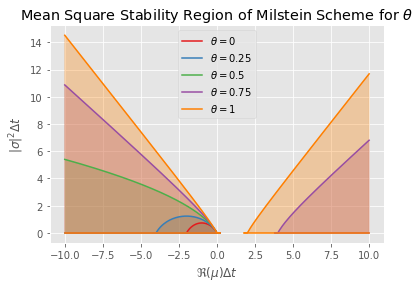

In [2]:
fig, ax = plt.subplots() # plot
x = np.linspace(-10,10,201) # x's to plot for

def ys(x,theta):
    """
    Two roots
    """
    c=1-2*x*((1-2*theta)*x + 2)
    # return nans if no route as no interval
    yl = np.array([np.nan]*len(x))
    yu = np.array([np.nan]*len(x))
    
    ind = np.where(c>=0) # where there's roots ie real
    x = x[ind]
    sq = np.sqrt(1-2*x*((1-2*theta)*x + 2))
    yl[ind] = -1-sq
    yu[ind] = -1+sq
    return yl,yu

thetas = [0,0.25,0.5,0.75,1] # thetas
cmap = cm.get_cmap("Set1") # colours
for v,i in enumerate(thetas): # for each theta
    yl,yu = ys(x,i) # roots
    # greater than 0
    yl = np.maximum(0,yl)
    yu = np.maximum(0,yu)
    # plot
    ax.plot(x,yu,label=r"$\theta=$"+str(i),color=cmap(v))
    ax.plot(x,yl,label=r"$\theta=$"+str(i),color=cmap(v))
    # fill region
    ax.fill_between(x, yl, yu, alpha=.3,color=cmap(v))
# sort out legend
handles,labels = ax.get_legend_handles_labels() 
labels,ids = np.unique(labels,return_index=True)
handles = [handles[i] for i in ids]
ax.legend(handles,labels)
ax.set_title(r"Mean Square Stability Region of Milstein Scheme for $\theta$")
ax.set_ylabel(r"$|\sigma|^{2}\Delta t$")
ax.set_xlabel(r"$\Re(\mu)\Delta t$")
plt.show()

The region of mean squared stability increases in size as $\theta$ increases.

### 4
We can see this is not the case as for this to be the case for some $\theta$ we would need the supremum of y to be $+\infty$ for all x. So we can show this is not true by counter example rearranging the inequality to get it in terms of $\theta$
$$
\frac{\frac{1}{2}y^{2}+y+x^{2}+x}{2x^{2}} < \theta \leq 1
$$
We can show this isn't true with a counter example $\mu=\sigma=\Delta t = 1 \implies y=x=1$

$$
\frac{\frac{1}{2}y^{2}+y+x^{2}+x}{2x^{2}} = \frac{7}{4} \nleq 1 
$$

So it cant be A-stable for any choice of $\theta$ and still satisfy $\theta\in[0,1]$

### 5

Setting $\theta=.25$,$\mu=-1$ and $\sigma=1$ $\implies |\sigma|^{2}=1$,$\Re(\mu)=-1$. We can then substitute this into the previously derived inequality.

$$
\begin{align}
\left(|\sigma|^{2}+2\Re(\mu)\right)\Delta t +\left(\frac{1}{2}|\sigma|^{4}+(1-2\theta)|\mu|^{2}\right)(\Delta t)^{2}&< 0 \\
\left(1-2\right)\Delta t +\left(\frac{1}{2}+(1-0.5)\right)(\Delta t)^{2}&< 0 \\
\Delta t (\Delta t -1)&< 0 \\
\end{align}
$$
Which is satisfied when $\Delta t$ is between its two roots $0<\Delta t < 1 \implies \Delta t < \Delta t^{*} :=1 $ so we must have this for mean squared stability.

In [3]:
theta,mu,sigma,T,dt=.25,-1,1,100,2
# step ahead
stepX = lambda mu,sigma,theta,dt,dw,x : x*(1+(1-theta)*mu*dt+sigma*dw+(dw**2 - dt)*sigma**2 / 2)/(1-mu*theta*dt)

steps = int(T/dt)

dw = np.sqrt(dt)*np.random.standard_normal(size=(steps,1000)) # brownian increments
x = np.ones(1000) # for 1000 paths
for l in range(steps): # calculate paths
    x = stepX(mu,sigma,theta,dt,dw[l],x)
ipy.display(ipy.Markdown(r"For $\Delta t = 2$: $\mathop{\mathbb{E}}(|X_{100}|^{2})=$ "+str(np.mean(x**2))))
# similarly with change in dt
dt = 1/2
steps = int(T/dt)
dw = np.sqrt(dt)*np.random.standard_normal(size=(steps,1000))
x = np.ones(1000)
for l in range(steps): # simulate
    x = stepX(mu,sigma,theta,dt,dw[l],x)
ipy.display(ipy.Markdown(r"For $\Delta t = \frac{1}{2}$: $\mathop{\mathbb{E}}(|X_{100}|^{2})=$ "+str(np.mean(x**2))))

For $\Delta t = 2$: $\mathop{\mathbb{E}}(|X_{100}|^{2})=$ 427.37593665120767

For $\Delta t = \frac{1}{2}$: $\mathop{\mathbb{E}}(|X_{100}|^{2})=$ 3.9349961432258284e-176

We see that for $\Delta t=2$ $\mathop{\mathbb{E}}(|X_{100}|^{2}$ is very large of the order of $10^{3}$ suggesting it is not mean square stable but for $\Delta t=\frac{1}{2}$ $\mathop{\mathbb{E}}(|X_{100}|^{2}$ is small of the order $10^{-175}$ so is close to zero suggesting it is mean squared stable. This is as we would expect based of the value of $\Delta t^{*}$ we previously derived.
### Bonus 
The definition of asymptotic stability is $\forall X_{0}\ne0,\mathop{\mathbb{P}}(\lim_{t\rightarrow\infty}X_{t}=0)=1$. If we can simplify similarly to before to get
$$
X_{n+1}^{\Delta t} = \frac{1+(1-\theta)\mu\Delta t + \sigma \xi_{n}\sqrt{\Delta t}}{1-\theta\mu\Delta t}X_{n}^{\Delta t}
$$
For the limit as $t\rightarrow\infty$ to be zero we must have and using the triangle inequality
$$
\begin{align}
\mathbb{P}\left(\lim_{N\rightarrow\infty}\prod_{n=0}^{N}\frac{1+(1-\theta)\mu\Delta t + \sigma \xi_{n}\sqrt{\Delta t}}{1-\theta\mu\Delta t}X_{n}=0\right)&=1\\
\mathbb{P}\left(X_{0}\lim_{N\rightarrow\infty}\prod_{n=0}^{N}\frac{1+(1-\theta)\mu\Delta t + \sigma \xi_{n}\sqrt{\Delta t}}{1-\theta\mu\Delta t}=0\right)&=1 \\
\mathbb{P}\left(\lim_{N\rightarrow\infty}\prod_{n=0}^{N}\frac{1+(1-\theta)\mu\Delta t + \sigma \xi_{n}\sqrt{\Delta t}}{1-\theta\mu\Delta t}=0\right)&=1 \\
\iff \forall n\in\mathbb{N},\mathbb{E}\left(\left|\frac{1+(1-\theta)\mu\Delta t + \sigma \xi_{n}\sqrt{\Delta t}}{1-\theta\mu\Delta t}\right|\right)&<1\\ 
\frac{1}{2}\left|\frac{1+(1-\theta)\mu\Delta t + \sigma\sqrt{\Delta t} }{1-\theta\mu\Delta t}\right|+\frac{1}{2}\left|\frac{1+(1-\theta)\mu\Delta t - \sigma\sqrt{\Delta t} }{1-\theta\mu\Delta t}\right|&<1\\ 
|1+(1-\theta)\mu\Delta t|\leq|1+(1-\theta)\mu\Delta t - \sigma\sqrt{\Delta t}|+|1+(1-\theta)\mu\Delta t + \sigma\sqrt{\Delta t}| &<2|1-\mu\theta\Delta t|\\
0&< |1-(1+\theta)\mu\Delta t|\leq 2|1-\mu\theta\Delta t| -|1+(1-\theta)\mu\Delta t|\\
|-1+(1+\theta)\mu\Delta t| &> 0 \\
1 &\ne  (1+\theta)\mu\Delta t\\
\frac{1 -\mu\Delta t}{\mu\Delta t} &\ne \theta
\end{align}
$$
So it is asymptoticly stable for all $ \theta\ne\frac{1 -\mu\Delta t}{\mu\Delta t} $


## Problem 2
### 1

Using the substitution $Y_{t}= X_{t}-\mu$ the Ornstein-Ulenbeck equation becomes
$$
dX_{t}=dY_{t} = -\theta dY_{t}dt+\sigma dW_{t}
$$
We then define $Z_{t}=\exp(\theta t)Y_{t}$ (integrating factor) to remove the drift
$$
\begin{align}
dZ_{t} &= \sigma \exp(\theta t)dW_{t} \\
Z_{t} &= Z_{0} + \sigma \int_{0}^{t} \exp(\theta s)dW_{s} \\
\end{align}
$$
We then backpropogate to get in terms of $X_{t}$ and sub in given values
$$
\begin{align}
Y_{t} &= Y_{0}\exp(-\theta t) + \sigma \exp(-\theta t)\int_{0}^{t} \exp(\theta s)dW_{s} \\
X_{t} &= \mu + (X_{0}-\mu)\exp(-\theta t) + \sigma \int_{0}^{t} \exp(\theta (s-t))dW_{s} \\
X_{t} &= -1 + x\exp(-t) + \sqrt{2} \int_{0}^{t} \exp( (s-t))dW_{s} \\
\end{align}
$$
Using $T=1$ and removing independent and zero mean terms and using the distribution of $x$
$$
\begin{align}
\mathop{\mathbb{E}}(X_{T=1}^{2}) &= \mathop{\mathbb{E}}(-1 + \exp(-2)x)^{2} + 2 \mathop{\mathbb{E}}\left(\left|\int_{0}^{1} \exp( (s-1))dW_{s}\right|^{2}\right)\\
&=1 +  \int_{0}^{1} \exp( 2(s-1))ds \\
&=1 +\exp(-4)\mathop{\mathbb{E}}(x^{2}) + 1 - \exp(-2) \\
&= 2 +\exp(-2)(\exp(-2)-1)
\end{align}
$$

### 2

Using the notations given and the riemann sum we see
$$
I_{N} = \sum^{N}_{i=1} f\left(\left\lfloor\frac{i-1}{\Delta_{N}}\right\rfloor\Delta_{N}\right) (W_{i\Delta_{N}} - W_{(i-1)\Delta_{N}})
$$

We can see this is a sum of scaled gaussians as brownian motion is defined as $W_{s}\sim\mathbb{N}(0,s)$ and the difference of brownian motion is also gaussian so it must also be gaussian. We find its first and second moments as this uniquely defines it due to it being gaussian.
$$
\begin{align}
\mathop{\mathbb{E}}(I_{N}) &= \mathop{\mathbb{E}}\left(\sum^{N}_{i=1} f_{N}(i-1) (W_{i\Delta_{N}} - W_{(i-1)\Delta_{N}})\right) \\
&= \sum^{N}_{i=1} f_{N}(i-1) \mathop{\mathbb{E}}(W_{i\Delta_{N}} - W_{(i-1)\Delta_{N}}) \\
&= \sum^{N}_{i=1} f_{N}(i-1) 0 \\
&= 0\\
\mathop{\mathbb{E}}(I_{N}^2) &= \mathop{\mathbb{E}}\left(\left(\sum^{N}_{i=1} f_{N}(i-1) (W_{i\Delta_{N}} - W_{(i-1)\Delta_{N}})\right)\left(\sum^{N}_{s=1} f_{N}(s-1) (W_{s\Delta_{N}} - W_{(s-1)\Delta_{N}})\right)\right) \\
&= \mathop{\mathbb{E}}\left(\sum^{N}_{i=1} f_{N}(i-1)^{2} (W_{i\Delta_{N}} - W_{(i-1)\Delta_{N}})^{2}\right) \\
&= \sum^{N}_{i=1} f_{N}(i-1)^{2} (i\Delta_{N} - (i-1)\Delta_{N})\\
&= \int^{T}_{0}|f_{N}(s)|^{2}ds\\
\end{align} 
$$
Using the independence of brownian motion, its mean and variance and $i\Delta_{N}$ representing increments in time. This gives us 
$$
I_{N}\sim\mathbb{N}(0,\int^{T}_{0}|f_{N}(s)|^{2}ds)
$$
As we take the convergence of $f_{N}\rightarrow f$ as $N\rightarrow\infty$ in L2 and thereby convergence of a sequence of random variables $I_{N}$ to $I$ implies convergence in distribution to the same limit we get the required result.
$$
I\sim\mathbb{N}(0,\int^{T}_{0}|f(s)|^{2}ds)
$$
### 3

The weak error is defined as $|\mathop{\mathbb{E}}(X_{\frac{T}{\Delta t}}^{\Delta t}) - \mathop{\mathbb{E}}(X_{T})|$ so we want the method to have the same expected value. Looking at the general solution for a Ornstein–Uhlenbeck equation above.
$$
\begin{align}
Z_{t+\Delta t}&= Z_{t} + \sigma \int^{t+\Delta t}_{t}\exp(\theta s) dW_{s}\\
\exp{\theta(t+\Delta t)}Y_{t+\Delta t} &= \exp(\theta t) Y_{t} + \sigma \int^{t+\Delta t}_{t}\exp(\theta s) dW_{s}\\
Y_{t+\Delta t} &= \exp(-\theta \Delta t) Y_{t} + \sigma \int^{t+\Delta t}_{t}\exp(\theta (s-(t+\Delta t))) dW_{s}\\
X_{t+\Delta t} &= \mu + \exp(-\theta \Delta t) (X_{t}-\mu) + \sigma \int^{t+\Delta t}_{t}\exp(\theta (s-(t+\Delta t))) dW_{s}\\
\end{align}
$$
This gives us $a(\Delta t) = \exp(-\theta \Delta t)$ for $b(\Delta t)$ we need to use part 2 and the distribution of the final term.

$$
\begin{align}
\int^{t+\Delta t}_{t}f(s)dW_{s}&\sim\mathcal{N}(0,\int^{t+\Delta t}_{t}|f(s)|^{2}ds) \\
\sigma \int^{t+\Delta t}_{t}\exp(\theta (s-(t+\Delta t))) dW_{s}&\sim\mathcal{N}(0,\sigma^{2}\int^{t+\Delta t}_{t}|\exp(\theta (s-(t+\Delta t)))|^{2}ds)\\
\sigma^{2}\int^{t+\Delta t}_{t}|\exp(\theta (s-(t+\Delta t)))|^{2}ds &= \sigma^{2}\int^{t+\Delta t}_{t}\exp(2\theta (s-(t+\Delta t)))ds \\
&= \sigma^{2}\frac{1-\exp(-2\theta\Delta t)}{2\theta}
\end{align}
$$

Using the properties of the normal distribution we can see we need $b(\Delta t)= \sigma \sqrt{\frac{1-\exp(-2\theta\Delta t)}{2\theta}}$ to have the same distribuion. Thus the numerical method becomes
$$
\begin{align}
X_{n+1}^{\Delta t} &= \mu +\exp(-\theta \Delta t)(X_{n}^{\Delta t}-\mu) + \xi\sigma \sqrt{\frac{1-\exp(-2\theta\Delta t)}{2\theta}} \\
&= -1+\exp(- \Delta t)(X_{n}^{\Delta t}+1) + \xi\sqrt{1-\exp(-2\Delta t)}
\end{align}
$$


### 4




Simulation: 100%|##########################################################################################| 100/100 [00:02<00:00, 38.52it/s]


Empirical confidence interval for $\mathbb{E}[X^{2}_{T}]\in$ \[4.044772607625601e-05,8.375629361781835\]

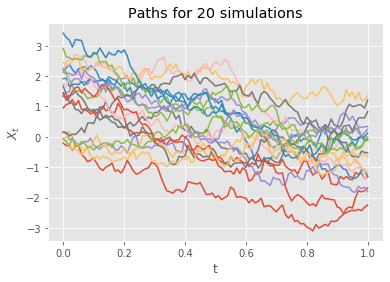

In [4]:
# set values
n = int(10e5)
dt = .01
T = 1
steps = int(T/dt)
# step ahead
f = lambda x,dt,e: -1+(x+1)*np.exp(-dt)+np.sqrt(1-np.exp(-2*dt))*e
r = np.random.normal(size=(steps+1,n))
x = np.ones(n) + r[0]

e = r[1:]
with tqdm(total=steps,ascii=True,desc="Simulation") as pbar:# simulate for n trajectories

    for i in range(steps):
        x = f(x,dt,e[i])
        pbar.update(1)

ordered = np.sort(x**2) #calculate empirical x^2 and order
li = int(n*0.01/2)
# print empirical CI
ipy.display(ipy.Markdown("Empirical confidence interval for "+r"$\mathbb{E}[X^{2}_{T}]\in$ "+ f"\[{ordered[li-1]},{ordered[n-li - 1]}\]"))
# plot 20 paths
r = np.random.normal(size=(steps+1,20))
x = np.ones((steps+1,20)) 
x[0]=x[0] + r[0]
e = r[1:]
for i in range(steps):# simulate
    x[i+1] = f(x[i],dt,e[i])
#plot
plt.figure()
xaxis= np.linspace(0,T,steps+1)
for i in x.T: # plot each trajectory
    plt.plot(xaxis,i)
plt.xlabel("t")
plt.ylabel(r"$X_{t}$")
plt.title("Paths for 20 simulations")
plt.show()

We see the empirical value of the second moment we see that the confidence interval is large but contains the analytical solution. Showing theres a lot of variation in the trajectories. This is also shown in the plot of the 20 trajectories. At the final time point they aren't close together.

### 5

We see that 

$$
X_{t_{n+1}}|X_{t_{n}}\sim \mathcal{N}\left((X_{t_{n}}+1)\exp(-\Delta t)-1,1-\exp(-2\Delta t)\right)
$$

So the likelihood function represents the joint pdf of the data $\hat{X}$. Using the above and the defined distribution of $X_{t_{0}}$

$$
L = f(\hat{X}) =\left|\frac{1}{2\pi}\right|^{\frac{N+1}{2}}\left|\frac{1}{1-\exp(-2\Delta t)}\right|^{\frac{N}{2}}\exp\left(-\frac{1}{2}\left((X_{t_{0}}-1)^{2} + \frac{\sum^{N-1}_{k=0}(X_{t_{k+1}}-((X_{t_{k}}+1)\exp(-\Delta t)-1))^{2}}{1-\exp(-2\Delta t)}\right)\right)
$$


### 6

Using the above pdf we can write the log likelihood as
$$
\begin{align}
L &= \left|\frac{1}{2\pi}\right|^{\frac{N+1}{2}}\left|\frac{\theta}{1-\exp(-2\theta\Delta t)}\right|^{\frac{N}{2}}\exp\left(-\frac{1}{2}\left((X_{t_{0}}-1)^{2} + \frac{\theta\sum^{N-1}_{k=0}(X_{t_{k+1}}-((X_{t_{k}}+1)\exp(-\theta\Delta t)-1))^{2}}{1-\exp(-2\theta\Delta t)}\right)\right)\\
\log L &= \frac{N}{2}\log\left(\frac{\theta}{1-\exp(-2\theta\Delta t)}\right)-\frac{N+1}{2}\log(2\pi)-\frac{1}{2}\left((X_{t_{0}}-1)^{2} + \frac{\theta\sum^{N-1}_{k=0}(X_{t_{k+1}}-((X_{t_{k}}+1)\exp(-\theta\Delta t)-1))^{2}}{1-\exp(-2\theta\Delta t)}\right) \\
\frac{d\log L}{d\theta} &= 0 \\
\implies \hat{\theta}_{MLE} &= -\frac{1}{\Delta t}\log\left(\frac{\frac{1}{N}\sum^{N-1}_{k=0}X_{t_{k}}X_{t_{k+1}}-\frac{1}{N^{2}}\sum^{N-1}_{k=0}X_{t_{k}}\sum^{N-1}_{k=0}X_{t_{k+1}}}{\frac{1}{N}\sum^{N-1}_{k=0}X_{t_{k}}^{2}-\frac{1}{N^{2}}(\sum^{N-1}_{k=0}X_{t_{k}})^{2}}\right)
\end{align}
$$



In [5]:
# set values
N = int(10e7)
dt=.1
r = np.random.normal(size=N)
x = np.ones(N+1)
x[0] = x[0]+ np.random.normal(size=1)
with tqdm(total=N,ascii=True,desc="Long simulation") as pbar: # simulate
    for i in range(N):
        x[i+1] = f(x[i],dt,r[i])
        pbar.update(1)
# calculate MLE estimator based on trajectory
theta = -np.log((1/N * np.sum(x[1:]*x[:-1])-1/(N**2) * np.sum(x[1:])*np.sum(x[:-1]))/(1/N * np.sum(x[:-1]**2)-1/(N**2) * np.sum(x[:-1])**2))/dt
ipy.display(ipy.Markdown(r"$\hat{\theta}=$"+str(theta)))


Long simulation: 100%|#####################################################################| 100000000/100000000 [11:12<00:00, 148774.61it/s]


$\hat{\theta}=$0.9996515750203334

### 7
First the joint pdf is
$$
\begin{align}
f_{\theta,\hat{X}}(\theta,\hat{X})&=f_{\hat{X}|\theta}(\hat{X}|\theta)f_{\theta}(\theta)\\
&= \left|\frac{\theta}{1-\exp(-2\theta\Delta t)}\right|^{\frac{N}{2}}\left|\frac{1}{2\pi}\right|^{\frac{N+2}{2}}\exp\left(-\frac{1}{2}\left((\theta-2)^{2}+(x_{t_{0}}-1)^{2}+\frac{\theta\sum^{N-1}_{k=0}|x_{t_{k+1}}+1-\exp(-\theta\Delta t)(1+x_{t_{k}})|^{2}}{1-\exp(-2\theta\Delta t)}\right)\right)
\end{align}
$$
Then the conditional pdf using the above
$$
\begin{align}
f_{\theta|\hat{X}}(\theta|\hat{X}) &= \frac{f_{\hat{X}|\theta}(\hat{X}|\theta)f_{\theta}(\theta)}{\int_{\mathbb{R}} f_{\hat{X}|\theta}(\hat{X}|\theta)f_{\theta}(\theta)d\theta}\\
&=\frac{f_{\theta,\hat{X}}(\theta,\hat{X})}{\int f_{\theta,\hat{X}}(\theta,\hat{X})d\theta}\\
&=\frac{\left|\frac{\theta}{1-\exp(-2\theta\Delta t)}\right|^{\frac{N}{2}}\left|\frac{1}{2\pi}\right|^{\frac{N+2}{2}}\exp\left(-\frac{1}{2}\left((\theta-2)^{2}+(x_{t_{0}}-1)^{2}+\frac{\theta\sum^{N-1}_{k=0}|x_{t_{k+1}}+1-\exp(-\theta\Delta t)(1+x_{t_{k}})|^{2}}{1-\exp(-2\theta\Delta t)}\right)\right)}{I_{N}}
\end{align}
$$
We do not need to calculate $I_{N}$ or the constant before the exponetial term for calculating $\hat{\theta}_{MAP}$ as it is the modal value.

$\hat{\theta}_{MAP}=$0.9996451622399537

Absolute difference of the estimators $|\hat{\theta}_{MLE}-\hat{\theta}_{MAP}|=$6.412780379716487e-06

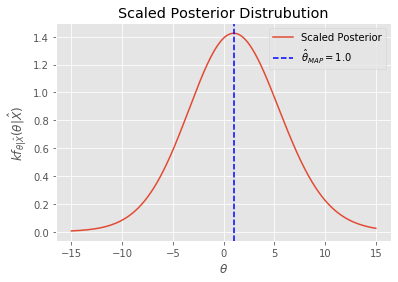

In [6]:
mle_theta=theta
# precalculate values for efficency
k= -((x[0]-1)**2) / 2

l2 = np.sum(x[1:]**2)
lr = np.sum(x[1:]*x[:-1])
l = np.sum(x[1:])
r2 = np.sum(x[:-1]**2)
r = np.sum(x[:-1])





def logJointPDF(theta,dt):
    """
    log joint pdf to avoid overflow
    """
    e1 = np.exp(-theta*dt)
    e2 = np.exp(-2*theta*dt)
    
    summationTerm = l2 - 2 *lr *e1 + 2*l*(1-e1) +e2*(r2+2*r)-2*e1*r+N*(e2-2*e1+1)
    return k+np.log(theta/(1-e2))*(N/2) -(1/2)*((theta-2)**2 + theta*summationTerm/(1-e2))

# scaled joint pdf
jointPDF = lambda theta : np.exp(logJointPDF(theta,dt)/N)

# min,max theta
ll,ul = -100,100
thetas = np.linspace(ll,ul,100001)#thetas to test
thetas = thetas[np.where(thetas!=0)]#not defined at zero
# get interpolated values
interpolated = si2.interp1d(thetas,jointPDF(thetas))
ts = np.linspace(-15,15,10001)
# take negative so max becomes min for fminbound
temp2 = lambda theta: -jointPDF(theta)
mapTheta = sop.fminbound(temp2,ll,ul) # find estimate
# print
s = r"$\hat{\theta}_{MAP}=$"+str(mapTheta)
ipy.display(ipy.Markdown(s))
ipy.display(ipy.Markdown(r"Absolute difference of the estimators $|\hat{\theta}_{MLE}-\hat{\theta}_{MAP}|=$"+str(np.abs(mapTheta-mle_theta))))
# plot
plt.figure()
plt.plot(ts,interpolated(ts),label="Scaled Posterior")
plt.axvline(mapTheta,label=r"$\hat{\theta}_{MAP}=$"+str(np.round(mapTheta,3)),linestyle="--",color="b")
plt.ylabel(r"$kf_{\theta|\hat{X}}(\theta|\hat{X}) $")
plt.xlabel(r"$\theta$")
plt.title("Scaled Posterior Distrubution")
plt.legend()
plt.show()




k represents a constant that can be removed by dividing by the integral of the joint probability wrt $\theta$. The MAP estimate is very close the MLE estimate and the value used to generate the data. The advantage of the MAP estimator comes from being able to produce a confidence interval but requires priori knowledge of $\theta$

### Bonus
To be able to find the confidence interval we need to first remove the constant k by integrating the calculated joint pdf wrt $\theta$ and dividing by this pdf. We then integrate this wrt $\theta$ again to get the cdf. Then we can easily calculate the confidence interval.

In [7]:

# integrate joint pdf so its a proper pdf
wrapper = lambda theta,y:jointPDF(theta)
condInt=si1.solve_ivp(wrapper,(ll,ul),[wrapper(ll,1)],t_eval=[ul])
# calculate the cdf from the pdf by integrating
wrapper = lambda theta,y:jointPDF(theta)/condInt.y[-1,-1]
cdf = si1.solve_ivp(wrapper,(ll,ul),[wrapper(ll,0)],dense_output=True)
# find confidence interval by turning into the calculation of roots
wrapper = lambda theta,v:cdf.sol(theta) - v
cil=sop.brentq(wrapper,ll,mapTheta,args=(0.005))
ciu=sop.brentq(wrapper,mapTheta,ul,args=(0.995))
# print
ipy.display(ipy.Markdown(r"The 99% confidence interval is $\hat{\theta}_{MAP}\in$" +f"[{cil},{ciu}]"))

The 99% confidence interval is $\hat{\theta}_{MAP}\in$[-11.197455584947782,13.738332459321851]

We see that there's a large confidence interval for the MAP estimate that includes the actual value to generate the data. This could be because of the mean of the prior is 2 when the value used in the calculation of the data was a fixed value of 1 which occurs with probability of 0.24. This shows we shouldn't be very confident in this estimate. Using a longer series may improve the size of this confidence interval but the series is already long.
## Problem 3
### 1
Using the definition of the Stratonovich integral using $W_{0}=0$
$$
\begin{align}
\int^{t}_{0}W_{s}\circ dW_{s} &= \lim_{N\rightarrow\infty}\sum^{N-1}_{j=0}\frac{W_{t^{N}_{j+1}}+W_{t^{N}_{j}}}{2}(W_{t^{N}_{j+1}}-W_{t^{N}_{j}}) \\
&= \lim_{N\rightarrow\infty}\sum^{N-1}_{j=0}\frac{(W_{t^{N}_{j+1}})^{2}-(W_{t^{N}_{j}})^{2}}{2} \\
&= \frac{W_{t}^{2}}{2}\\
\end{align}
$$
Setting $h^\prime(W_{s})=W_{s}^{m} \implies h(W_{s})=\frac{W_{s}^{m+1}}{m+1} + c$ where c is a constant with $b=0$ and $\sigma=1$
$$
\begin{align}
h(W_{t})-h(W_{0})&=\int^{t}_{0}h^\prime(W_{s})\circ dW_{s} \\
&=\int^{t}_{0}W^{m}_{s}\circ dW_{s}\\
 &= \frac{W_{t}^{m+1}-W_{0}^{m+1}}{m+1} \\
&= \frac{W_{t}^{m+1}}{m+1} 
\end{align}
$$
### 2
Rearranging the equation and noting that the Stratonovich SDE obeys the chain rule
$$
\begin{align}
dX_{t} &= \mu X_{t}dt + \sigma X_{t}\circ dW_{t} \\
\frac{1}{X_{t}}dX_{t} &= \mu dt + \sigma \circ dW_{t} \\
d\ln(X_{t}) &= \mu dt + \sigma \circ dW_{t} \\
\ln(X_{t}) - 0 &= \mu t + \sigma W_{t} \\
X_{t} &= \exp(\mu t + \sigma W_{t})\\
\end{align}
$$

### 3

We first find the integral in the left handside
$$
\begin{align}
J^{s,t}_{(1)} &= \int^{t}_{s}1\circ dW_{u_{1}} \\
&= W_{t}-W_{s}
\end{align}
$$

Using (7) with $h(w,t)=(t-s)(W_{t}-W_{s})$ we calculate the RHS
$$
\begin{align}
J^{s,t}_{(0,1)} + J^{s,t}_{(1,0)} &= \int^{t}_{s}\int^{u_{1}}_{s}du_{2}\circ dW_{u_{1}} + \int^{t}_{s}\int^{u_{1}}_{s} 1 \circ dW_{u_{2}}du_{1} \\
&= \int^{t}_{s}(u_{1}-s) \circ dW_{u_{1}} + \int^{t}_{s}(W_{u_{1}} - W_{s}) du_{1} \\ 
&= (t-s)(W_{t}-W_{s}) - (s-s)(W_{s}-W_{s}) \\
&=(t-s)(W_{t}-W_{s})  \\
&= (t-s)J^{s,t}_{(1)}
\end{align}
$$
We first calculate the integral in the RHS
$$
\begin{align}
J^{s,t}_{(1,1)} &= \int^{t}_{s}\int^{u_{1}}_{s}1\circ dW_{u_{2}}\circ dW_{u_{1}} \\
&= \int^{t}_{s}(W_{u_{1}}-W_{s})\circ dW_{u_{1}} \\
&= \frac{W_{t}^{2}}{2} - \frac{3W_{s}^{2}}{2} - W_{t}W_{s}\\
\end{align}
$$
Then we perform the innermost integrations
$$
\begin{align}
J^{s,t}_{(1,1,0)} &= \int^{t}_{s}\int^{u_{1}}_{s}\int^{u_{2}}_{s}1\circ dW_{u_{3}}\circ dW_{u_{2}}du_{1}\\
&= \int^{t}_{s}(\frac{W_{t}^{2}}{2} - \frac{3W_{s}^{2}}{2} - W_{t}W_{s})du_{1}\\
J^{s,t}_{(1,0,1)} &= \int^{t}_{s}\int^{u_{1}}_{s}\int^{u_{2}}_{s}1\circ dW_{u_{3}} du_{2}\circ dW{u_{1}}\\
&= \int^{t}_{s}\int^{u_{1}}_{s}(W_{u_{2}}-W_{s})du_{2}\circ dW{u_{1}}\\
J^{s,t}_{(0,1,1)} &= \int^{t}_{s}\int^{u_{1}}_{s}\int^{u_{2}}_{s}du_{3}\circ dW{u_{2}}\circ dW{u_{1}}\\
&=\int^{t}_{s}\int^{u_{1}}_{s}(u_{2}-s)\circ dW{u_{2}}\circ dW{u_{1}}\\
\end{align}
$$
Let $h(W_{u_{1}},u_{1})=(W_{u_{1}}-W_{s})(u_{1}-s)$ and using (7) we combine
$$
\begin{align}
J^{s,t}_{(1,0,1)} +J^{s,t}_{(0,1,1)} &= \int^{t}_{s}\int^{u_{1}}_{s}(W_{u_{2}}-W_{s})du_{2}\circ dW{u_{1}}+\int^{t}_{s}\int^{u_{1}}_{s}int^{u_{2}}_{s}du_{3}\circ dW{u_{2}}\circ dW{u_{1}}\\
&= \int^{t}_{s}\left(\int^{u_{1}}_{s}(W_{u_{2}}-W_{s})du_{2}+\int^{u_{1}}_{s}(u_{2}-s)\circ dW{u_{2}}\right)\circ dW{u_{1}}\\
&=\int^{t}_{s}\left((W_{u_{1}}-W_{s})(u_{1}-s)\right)\circ dW{u_{1}}\\
\end{align}
$$
Let $h(W_{u_{1}},u_{1}) =u_{1}\frac{W_{u_{1}}^{2}}{2}-u_{1}W_{s}W_{u_{1}}-s\frac{W_{u_{1}}^{2}}{2}+sW_{s}W_{u_{1}}-3u_{1}\frac{W_{s}^{2}}{2}$ and using (7) we combine a final time 

$$
\begin{align}
J^{s,t}_{(1,0,1)} +J^{s,t}_{(0,1,1)}+J^{s,t}_{(1,1,0)} &=  \int^{t}_{s}\left((W_{u_{1}}-W_{s})(u_{1}-s)\right)\circ dW{u_{1}} + \int^{t}_{s}(\frac{W_{t}^{2}}{2} - \frac{3W_{s}^{2}}{2} - W_{t}W_{s})du_{1} \\
&= h(W_{t},t) - h(W_{s},s) \\
&= t\frac{W_{t}^{2}}{2} -tW_{t}W_{s}-s\frac{W_{t}^{2}}{2} + sW_{s}W_{t} - 3t\frac{W_{s}^{2}}{2} + 3s\frac{W_{s}^{2}}{2}\\
&= (t-s)\left(\frac{W_{t}^{2}}{2} - \frac{3W_{s}^{2}}{2} - W_{t}W_{s}\right)\\
&= (t-s)J^{s,t}_{(1,1)}
\end{align}
$$
Thus giving us the required identities

### 4

$$
\begin{align}
dX_{t}&= b(X_{t})dt + \sigma(X_{t})\circ dW_{t} \\
X_{t} - X_{s} &= \int^{t}_{s}b(X_{s_{1}})ds_{1} + \int^{t}_{s}\sigma(X_{s_{1}})\circ dW_{s_{1}}
\end{align}
$$
Then applying (7) with $\mathcal{L}_{0}=b(x)\partial x$ and $\mathcal{L}_{1}=\sigma(x)\partial x$

$$
\begin{align}
b(X_{s_{1}}) &= b(X_{s}) +\int^{s_{1}}_{s}\mathcal{L}_{0}b(X_{s_{2}})ds_{2} + \int^{s_{1}}_{s}\mathcal{L}_{1}b(X_{s_{2}})\circ dW_{s_{2}} \\
\sigma(X_{s_{1}}) &= \sigma(X_{s}) +\int^{s_{1}}_{s}\mathcal{L}_{0}\sigma(X_{s_{2}})ds_{2} + \int^{s_{1}}_{s}\mathcal{L}_{1}\sigma(X_{s_{2}})\circ dW_{s_{2}} \\
\end{align}
$$
Then applying again as before
$$
\begin{align}
\mathcal{L}_{0}b(X_{s_{2}}) &= \mathcal{L}_{0}b(X_{s}) +\int^{s_{2}}_{s}\mathcal{L}_{0}(\mathcal{L}_{0}b)(X_{s_{3}})ds_{3} + \int^{s_{2}}_{s}\mathcal{L}_{1}\mathcal{L}_{0}b(X_{s_{3}})\circ dW_{s_{3}} \\
\mathcal{L}_{0}\sigma(X_{s_{2}}) &= \mathcal{L}_{0}\sigma(X_{s}) +\int^{s_{2}}_{s}\mathcal{L}_{0}(\mathcal{L}_{0}\sigma)(X_{s_{3}})ds_{3} + \int^{s_{2}}_{s}\mathcal{L}_{1}(\mathcal{L}_{0})\sigma(X_{s_{3}}) \circ dW_{s_{3}} \\
\mathcal{L}_{1}b(X_{s_{2}}) &= \mathcal{L}_{1}b(X_{s}) +\int^{s_{2}}_{s}\mathcal{L}_{0}(\mathcal{L}_{1}b)(X_{s_{3}})ds_{3} + \int^{s_{2}}_{s}\mathcal{L}_{1}(\mathcal{L}_{1}b)(X_{s_{3}})\circ dW_{s_{3}} \\
\mathcal{L}_{1}\sigma(X_{s_{2}}) &= \mathcal{L}_{1}\sigma(X_{s}) +\int^{s_{2}}_{s}\mathcal{L}_{0}(\mathcal{L}_{1}\sigma)(X_{s_{3}})ds_{3} + \int^{s_{2}}_{s}\mathcal{L}_{1}(\mathcal{L}_{1}\sigma)(X_{s_{3}})\circ dW_{s_{3}} \\
\end{align}
$$


Rewriting the equation we get 

$$
\begin{split}
X_{t} - X_{s} &= b(X_{s})\int^{t}_{s}ds_{1} +\sigma(X_{s})\int^{t}_{s}1\circ dW{s_{1}} \\
& +  \mathcal{L}_{0}b(X_{s})\int^{t}_{s}\int^{s_{1}}_{s}ds_{2}ds_{1} + \mathcal{L}_{1}b(X_{s})\int^{t}_{s}\int^{s_{1}}_{s}1\circ dW_{s_{2}}ds_{1} \\
& + \mathcal{L}_{0}\sigma(X_{s})\int^{t}_{s}\int^{s_{1}}_{s}ds_{2}\circ dW_{s_{1}} + \mathcal{L}_{1}\sigma(X_{s})\int^{t}_{s}\int^{s_{1}}_{s}1\circ dW_{s_{2}}\circ dW_{s_{1}} \\
& + \dots
\end{split}
$$
Where "$\dots$" represents the higher order terms. We can then use the definitions of $f_{\alpha}(x)$ and $J_{\alpha}^{s,t}$

$$
\begin{split}
X_{t} - X_{s} &= J^{s,t}_{(0)}f_{(0)}(X_{s}) +J^{s,t}_{(1)}f_{(1)}(X_{s}) \\
& +  J^{s,t}_{(0,0)}f_{(0,0)}(X_{s}) + J^{s,t}_{(0,1)}f_{(0,1)}(X_{s}) \\
& + J^{s,t}_{(1,0)}f_{(1,0)}(X_{s})+J^{s,t}_{(1,1)}f_{(1,1)}(X_{s})+ \dots
\end{split}
$$




### 5
We set $\gamma=2$ and look at the limit of the sum of $\alpha$'s
$$
\begin{align}
\sum_{i}(2-\alpha_{i}) &\leq 4 \\
2i - 4 \leq \sum_{i}\alpha_{i}  
\end{align}
$$
This gives us the set $A_{2}$ as
$$
\begin{align}
A_{\gamma} = A_{2} &= \left\{\alpha\in\{0,1\}^{n}:n>0, \sum_{i}(2-\alpha_{i}\leq 4)\right\} \\
 &= \{\{0\},\{1\},\{1,1\},\{0,0\},\{1,0\},\{0,1\},\{1,1,1\},\{0,1,1\},\{1,0,1\},\{1,1,0\},\{1,1,1,1\}\}
\end{align}
$$
To use the identities in part 3 we see the fact that for this equation as $b(x)=\mu x $ and $\sigma(x) = \sigma x$ are linear meaning 

$$
\begin{align}
\mathcal{f}_{(0,1)}(X_{n}^{\Delta t})&=\mathcal{f}_{(1,0)}(X_{n}^{\Delta t})=\mu\sigma X_{n}^{\Delta t} \\
\mathcal{f}_{(0,1,1)}(X_{n}^{\Delta t})&=\mathcal{f}_{(1,0,1)}(X_{n}^{\Delta t})=\mathcal{f}_{(0,1,1)}(X_{n}^{\Delta t})=\mu\sigma^{2} X_{n}^{\Delta t} \\
\end{align}
$$
So the summation term becomes 

$$
\begin{align}
\sum_{\alpha\in A_{2}}J^{t_{n},t_{n+1}}_{\alpha}\mathcal{f}_{\alpha}(X_{n}^{\Delta t}) &= J^{t_{n},t_{n+1}}_{(0)}\mathcal{f}_{(0)}(X_{n}^{\Delta t}) + J^{t_{n},t_{n+1}}_{(1)}(\mathcal{f}_{(1)}(X_{n}^{\Delta t})+(t_{n+1}-t_{n})\mathcal{f}_{(0,1)}(X_{n}^{\Delta t})) + J^{t_{n},t_{n+1}}_{(1,1)}(\mathcal{f}_{(1,1)}(X_{n}^{\Delta t})+(t_{n+1}-t_{n})\mathcal{f}_{(1,1,0)}(X_{n}^{\Delta t}))+J^{t_{n},t_{n+1}}_{(0,0)} \mathcal{f}_{(0,0)}(X_{n}^{\Delta t}) + J^{t_{n},t_{n+1}}_{(1,1,1)}\mathcal{f}_{(1,1,1)}(X_{n}^{\Delta t}) +  J^{t_{n},t_{n+1}}_{(1,1,1,1)}\mathcal{f}_{(1,1,1,1)}(X_{n}^{\Delta t})\\
&= X_{n}^{\Delta t} \left(
\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})(1+\mu(t_{n+1}-t_{n}))+\sigma^{2}\frac{(W_{t_{n+1}}-W_{t_{n}})^{2}}{2}(1+\mu(t_{n+1}-t_{n})) + \mu^{2}\frac{(t_{n+1}-t_{n})^{2}}{2}+\sigma^{3}\left(\frac{(W_{t_{n+1}}-W_{t_{n}})^{3}}{6}\right) +\sigma^{4}\left(\frac{(W_{t_{n+1}}-W_{t_{n}})^{4}}{24}\right)
\right) \\
\end{align}
$$

NS: 100%|####################################################################################################| 10/10 [00:02<00:00,  4.33it/s]


Order of convergence is 1.98118446950786


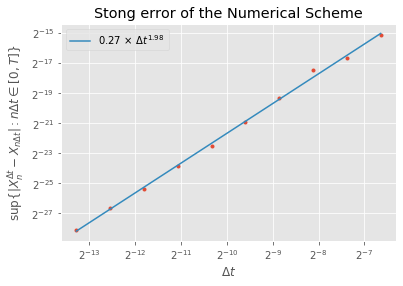

In [8]:
# set initial values
m, len_ns = 300, 10
ns = np.logspace(2, 4, len_ns)
ns = np.array([int(n) for n in ns])
errors =np.zeros(len_ns)
mu,sigma,T = -1,1,1
dts =T/ns
def f(x,dt,sigma,mu,dw):
    """
    1 step ahead
    """
    t1 = mu*dt
    t2 = sigma*dw
    return x*(1+t1+t2*(1+t1)+(t2**2)*(1+t1)/2 +(t1**2)/2+(t2**3)/6+(t2**4)/24)
with tqdm(total=len_ns,ascii=True,desc="NS") as pbar:
    for s,n in enumerate(ns): # for each dt caculate average strong error
        t = np.linspace(0,T,n+1)
        x = np.ones((n+1,m))
        w = np.zeros((n+1,m))
        for i in range(n):
            dw =np.sqrt(dts[s])* np.random.randn(m)
            x[i+1] = f(x[i],dts[s],sigma,mu,dw)
            w[i+1] = w[i]+dw # store for exact value
        exact = np.exp(mu*t[:,None]+sigma*w)
        errors[s] = np.mean(np.max(np.abs(x-exact),axis=0)) # calculate average max abs diff
        pbar.update(1)

    
    
# fit polynomial in log2 space and check order by looking at ceofficents
coeffs = np.polyfit(np.log2(dts), np.log2(errors), 1)
# plot
fig, ax = plt.subplots()
ax.set_title("Stong error of the Numerical Scheme")
ylabel = r"$\sup \{ |X^{\Delta t}_n  - X_{n \Delta t}|:" \
                + "n \Delta t \in [0, T] \}$"
ax.set_xlabel(r"$\Delta t$")
ax.set_ylabel(ylabel)
ax.set_xscale('log', basex=2)

ax.set_yscale('log', basey=2)
ax.plot(dts,errors, linestyle='', marker='.')
ax.plot(dts, 2**coeffs[1] * (dts)**coeffs[0],
            label=r'${:.2f} \, \times \, \Delta t^{{ {:.2f} }}$'.
            format(2**coeffs[1], coeffs[0]))
ax.legend()
print(f"Order of convergence is {coeffs[0]}")
plt.show()

We see that it has strong order of convergence 2 as we expected it to have.

### Bonus

We see that the exact solution for one time step ahead as
$$
\begin{align}
\int^{t_{n+1}}_{t_{n}}\frac{1}{X_{t}}dX_{t} &= \mu\int^{t_{n+1}}_{t_{n}}dt + \sigma\int^{t_{n+1}}_{t_{n}}1\circ dW_{t}\\
X_{t_{n+1}} &= X_{t_{n}}\exp\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)
\end{align}
$$
We can then use the definition of the exponential function to write the right handside as a sum.
$$
\begin{align}
X_{t_{n}}\exp\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right) &= X_{t_{n}}\sum^{\infty}_{k=0}\frac{\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)^{k}}{k!}\\
&= X_{t_{n}} + X_{t_{n}}\left(\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)+\frac{\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)^{2}}{2}+\frac{\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)^{3}}{6}+\frac{\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})\right)^{4}}{24}+\dots\right)\\
\end{align}
$$
This contains the terms in the scheme derived before and some terms not in the set. 

To find the weak order of convergence we look at the weak error defined as $\epsilon=\left|\mathbb{E}(X^{\Delta t}_{T/\Delta t})-\mathbb{E}(X_{T})\right|$. Using the exact solution and the fact that brownian motion is zero mean.
$$
\begin{align}
\mathbb{E}(X_{T}) &= \mathbb{E}(X_{T - \Delta t}\exp(\mu \Delta t + \sigma (W_{T}-W_{T-\Delta t})))\\
&= X_{T-\Delta t}\mathbb{E}(\exp(\mu \Delta t))\\
&= X_{T-\Delta t}\sum^{\infty}_{k=0}\frac{(\mu \Delta t)^{k}}{k!}\\
&= X_{T-\Delta t} + X_{T-\Delta t}\left(\mu \Delta t + \frac{(\mu \Delta t)^{2}}{2} + \dots\right)
\end{align}
$$
Now for the expected value of the numerical scheme we use the fact that as the difference of brownian motions is also gaussian so has an expected value of zero for odd powers and $\mathbb{E}((W_{t_{n+1}}-W_{t_{n}})^{2})=t_{n+1}-t_{n}$ and $\mathbb{E}((W_{t_{n+1}}-W_{t_{n}})^{4})=3(t_{n+1}-t_{n})^{2}$ and can be defined similarly for higher order moments by 

$$
\mathbb{E}((W_{t_{n+1}}-W_{t_{n}})^{p})= 
\begin{cases}
0, & \text{if } p \text{ is odd} \\
(t_{n+1}-t_{n})^{p/2}(p-1)!!, & \text{if } p \text{ is even}
\end{cases}
$$
Where $p!!$ is the double factorial so in this case
$$
(p-1)!! = \prod^{\frac{p}{2}}_{k=1}(2k-1)=(p-1)(p-3)\dots3\cdot1
$$
We then take the expectation of the numerical scheme.
$$
\begin{align}
\mathbb{E}(X_{T/\Delta t})&=\mathbb{E}(X_{T/\Delta t - \Delta t}) + \mathbb{E}\left(X_{T/\Delta t - \Delta t}\left(\mu(t_{n+1}-t_{n})+\sigma(W_{t_{n+1}}-W_{t_{n}})(1+\mu(t_{n+1}-t_{n}))+\sigma^{2}\frac{(W_{t_{n+1}}-W_{t_{n}})^{2}}{2}(1+\mu(t_{n+1}-t_{n})) + \mu^{2}\frac{(t_{n+1}-t_{n})^{2}}{2}+\sigma^{3}\left(\frac{(W_{t_{n+1}}-W_{t_{n}})^{3}}{6}\right) +\sigma^{4}\left(\frac{(W_{t_{n+1}}-W_{t_{n}})^{4}}{24}\right)\right)\right) \\
&= \mathbb{E}(X_{T/\Delta t - \Delta t})\left(1+\mu\Delta t +\frac{\sigma^{2}\Delta t}{2}(1+\mu\Delta t)+\frac{\mu^{2}(\Delta t)^{2}}{2}+\frac{\sigma{4}}{8}(\Delta t)^{2}\right)\\
&= \mathbb{E}(X_{T/\Delta t - \Delta t})\left(\left(\mu +\frac{\sigma^{2}}{2}\right)\Delta t +\left(\frac{\mu\sigma^{2}}{2}+\frac{\mu^{2}}{2}+\frac{\sigma^{4}}{8}\right)(\Delta t)^{2}\right)
\end{align}
$$
Then we get the weak error with $O(3)$ as terms of order 3 or greater 
$$
\begin{align}
\epsilon&=\left|\mathbb{E}(X_{T/\Delta t - \Delta t})\right|\left|\frac{\sigma^{2}}{2}\Delta t+\left(\frac{\mu\sigma^{2}}{2}+\frac{\sigma^{4}}{8}\right)(\Delta t)^{2} - O(3)\right|\\
&\leq \left|\mathbb{E}(X_{T/\Delta t - \Delta t})\right|\left|\frac{\sigma^{2}}{2}\Delta t+\left(\frac{\mu\sigma^{2}}{2}+\frac{\sigma^{4}}{8}\right)(\Delta t)^{2}\right|\\
&\leq k(\Delta t)^{2}
\end{align}
$$
Where k is some constant so the scheme has weak order of convergence 2
